https://youtu.be/DbeIqrwb_dE?feature=shared


In [1]:
import numpy as np
import torch

In [2]:
x = torch.randn(3)  # randn does do normal distributed random numbers
x

tensor([-0.3967, -0.2696,  0.1239])

In [3]:
x = torch.randn(3, requires_grad=True)  # tracks the gradient
# for computations with the tensor pytorch will create the computation graph
x

tensor([-0.9484,  0.2716,  0.3606], requires_grad=True)

In [4]:
y = x + 2
y

tensor([1.0516, 2.2716, 2.3606], grad_fn=<AddBackward0>)

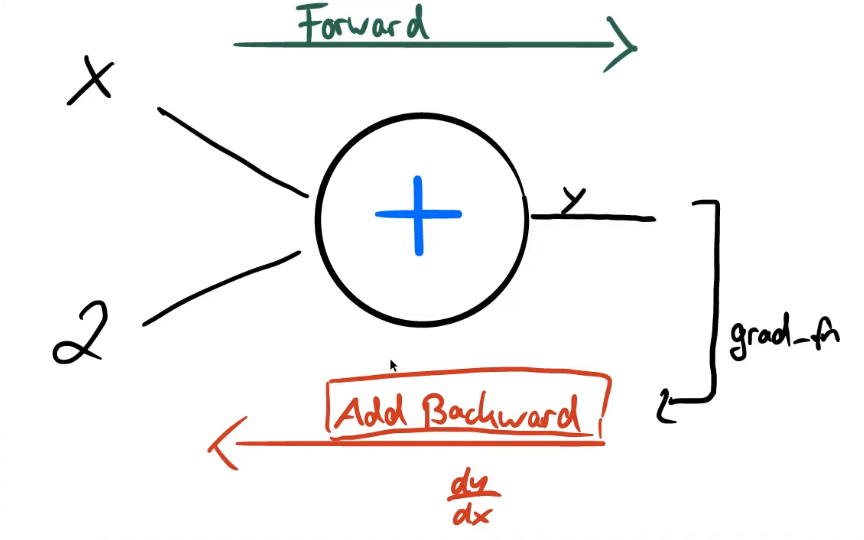


In [5]:
z = y * y * 2
z

tensor([ 2.2119, 10.3202, 11.1445], grad_fn=<MulBackward0>)

In [6]:
z = z.mean()
z

tensor(7.8922, grad_fn=<MeanBackward0>)

In [7]:
z.backward()  # this calculates the gradient of z with respect to x: dz/dx
x.grad  # this is the gradient of z with respect to x

tensor([1.4022, 3.0288, 3.1474])

requires_grad creates a jacobian matrix with the partial deviates:<br>
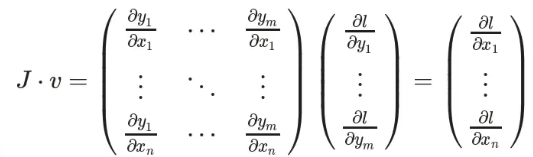<br>
This matrix is multiplied with a gradient vector to get the gradient we are interested in!<br>
This is called the chain rule!<br>


In [8]:
zz = y * y * 2
zz

tensor([ 2.2119, 10.3202, 11.1445], grad_fn=<MulBackward0>)

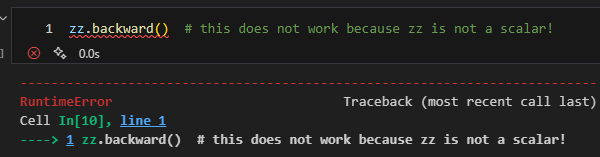


In [9]:
v = torch.tensor([0.1, 1.0, 0.001])
zz.backward(v)  # we have to pass a tensor of the same shape as z?
x.grad

tensor([ 1.8228, 12.1151,  3.1569])

In [10]:
x = torch.randn(3, requires_grad=True)
x

tensor([-1.2239, -1.7436, -0.7307], requires_grad=True)

In [11]:
# x.requires_grad_(False)  # this is how you can change the requires_grad attribute. As we don't want to track the gradient anymore during some training steps
# x.detach()  # this is another way to stop tracking the gradient. It returns a new tensor that doesn't track the gradient
# with torch.no_grad():  # this is another way to stop tracking the gradient
#     y = x + 2
#     print(y)
# examples:

In [12]:
y = x.detach()
x.requires_grad_(False), y

(tensor([-1.2239, -1.7436, -0.7307]), tensor([-1.2239, -1.7436, -0.7307]))

In [13]:
x = torch.randn(3, requires_grad=True)
with torch.no_grad():
    y = x + 2
    print(y)

tensor([2.2124, 1.8832, 1.4345])


In [14]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(1):
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])


In [15]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(2):
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [16]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(3):
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [17]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(3):
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_()  # this is how you can zero out the gradient.
    # This is necessary because pytorch accumulates the gradient.
    # So you have to zero it out after each epoch.
    # As every epoch is a new iteration of the training loop

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [18]:
weights = torch.ones(4, requires_grad=True)
optimizer = torch.optim.SGD(
    [weights], lr=0.01
)  # SGD = Stochastic Gradient Descent, lr = learning rate
optimizer.step()  # this is how you can update the weights
optimizer.zero_grad()  # this is how you can zero out the gradient -> weights.grad.zero_()